# CAP4631C Machine Learning I
## Presentation 2 
### Victor Roa - 09/28/2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#import time
#import itertools

In [2]:
houses_df= pd.read_csv("kc_house_data.csv")
houses_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
houses_df =houses_df.drop(['id','date','lat', 'long'], axis=1)
houses_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [4]:
houses_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [5]:
houses_df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
houses_df.max()

price            7700000.0
bedrooms              33.0
bathrooms              8.0
sqft_living        13540.0
sqft_lot         1651359.0
floors                 3.5
waterfront             1.0
view                   4.0
condition              5.0
grade                 13.0
sqft_above          9410.0
sqft_basement       4820.0
yr_built            2015.0
yr_renovated        2015.0
zipcode            98199.0
sqft_living15       6210.0
sqft_lot15        871200.0
dtype: float64

In [7]:
houses_df.min()

price            75000.0
bedrooms             0.0
bathrooms            0.0
sqft_living        290.0
sqft_lot           520.0
floors               1.0
waterfront           0.0
view                 0.0
condition            1.0
grade                1.0
sqft_above         290.0
sqft_basement        0.0
yr_built          1900.0
yr_renovated         0.0
zipcode          98001.0
sqft_living15      399.0
sqft_lot15         651.0
dtype: float64

In [10]:
X = houses_df.iloc[:,1:]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [11]:
y=houses_df.price
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.30, random_state=101) 


In [26]:
linear_regression=sm.OLS(y_train,X_train)
fitted_model2= linear_regression.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              8179.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:10:48   Log-Likelihood:                     -2.0727e+05
No. Observations:               15129   AIC:                                  4.146e+05
Df Residuals:                   15114   BIC:                                  4.147e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -4.036e+04   2517.569    -16.032      0.000   -4.53e+04   -3.54e+04
bathrooms      3.902e+04   4146.547      9.409      0.000    3.09e+04    4.71e+04
sqft_living     109.9797      2.912     37.768      0.000     104.272     115.687
sqft_lot          0.0357      0.059      0.602      0.547      -0.080       0.152
floors         2.966e+04   4478.705      6.624      0.000    2.09e+04    3.84e+04
waterfront     5.453e+05    2.2e+04     24.767      0.000    5.02e+05    5.88e+05
view           4.234e+04   2690.996     15.733      0.000    3.71e+04    4.76e+04
condition       2.23e+04   2983.895      7.472      0.000    1.64e+04    2.81e+04
grade          1.203e+05   2672.698     45.023      0.000    1.15e+05    1.26e+05
sqft_above       52.8608      2.805     18.847      0.000      47.363      58.358
sqft_basement    57.1189      3.325     17.180      0.000      50.602      63.636
yr_built      -3489.2256     82.921    -42.079      0.000   -3651.761   -3326.690
yr_renovated     11.4389      4.646      2.462      0.014       2.333      20.545
zipcode          61.4794      1.649     37.293      0.000      58.248      64.711
sqft_living15    25.4940      4.290      5.943      0.000      17.086      33.902
sqft_lot15       -0.5464      0.094     -5.826      0.000      -0.730      -0.363
==============================================================================
Omnibus:                    11703.562   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           886074.082
Skew:                           3.132   Prob(JB):                         0.00
Kurtosis:                      39.965   Cond. No.                     8.25e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.25e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#import statsmodels.formula.api as smf
#linear_regression = smf.ols(formula='price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+sqft_living15+sqft_lot15', data=houses_df)
#fitted_model = linear_regression.fit()
#fitted_model.summary()

In [27]:
y_pred= fitted_model2.predict(X_test)
print(y_pred)

3834     492322.847062
1348     562092.519317
20366    474148.955425
16617    417724.248244
20925    246043.786436
             ...      
1398     433164.299361
3364     453618.820148
18958    611202.264043
17845    163921.860637
16335    989277.115195
Length: 6484, dtype: float64


In [28]:
d = {'Y': y_test, 'Y predicted': y_pred}
y_comp= pd.DataFrame(d)
y_comp

,Y,Y predicted
3834,349950.0,492322.847062
1348,450000.0,562092.519317
20366,635000.0,474148.955425
16617,355500.0,417724.248244
20925,246950.0,246043.786436
...,...,...
1398,465000.0,433164.299361
3364,418000.0,453618.820148
18958,394250.0,611202.264043
17845,249500.0,163921.860637


In [29]:
correlation_matrix = X.corr()
print (correlation_matrix)

               bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms       1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront    -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.154178   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.018841   0.050739     0.055363  0.007644  0.006338   
zipcod

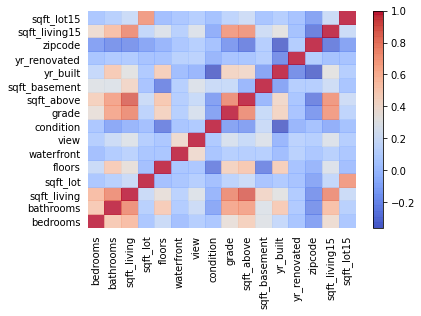

In [17]:
variables= houses_df.columns[1:]
def visualize_correlation_matrix (data, hurdle=0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom=False, \
    top=False, left = False, right = False)
    plt.colorbar()
    plt.show()
visualize_correlation_matrix(X, hurdle=0)

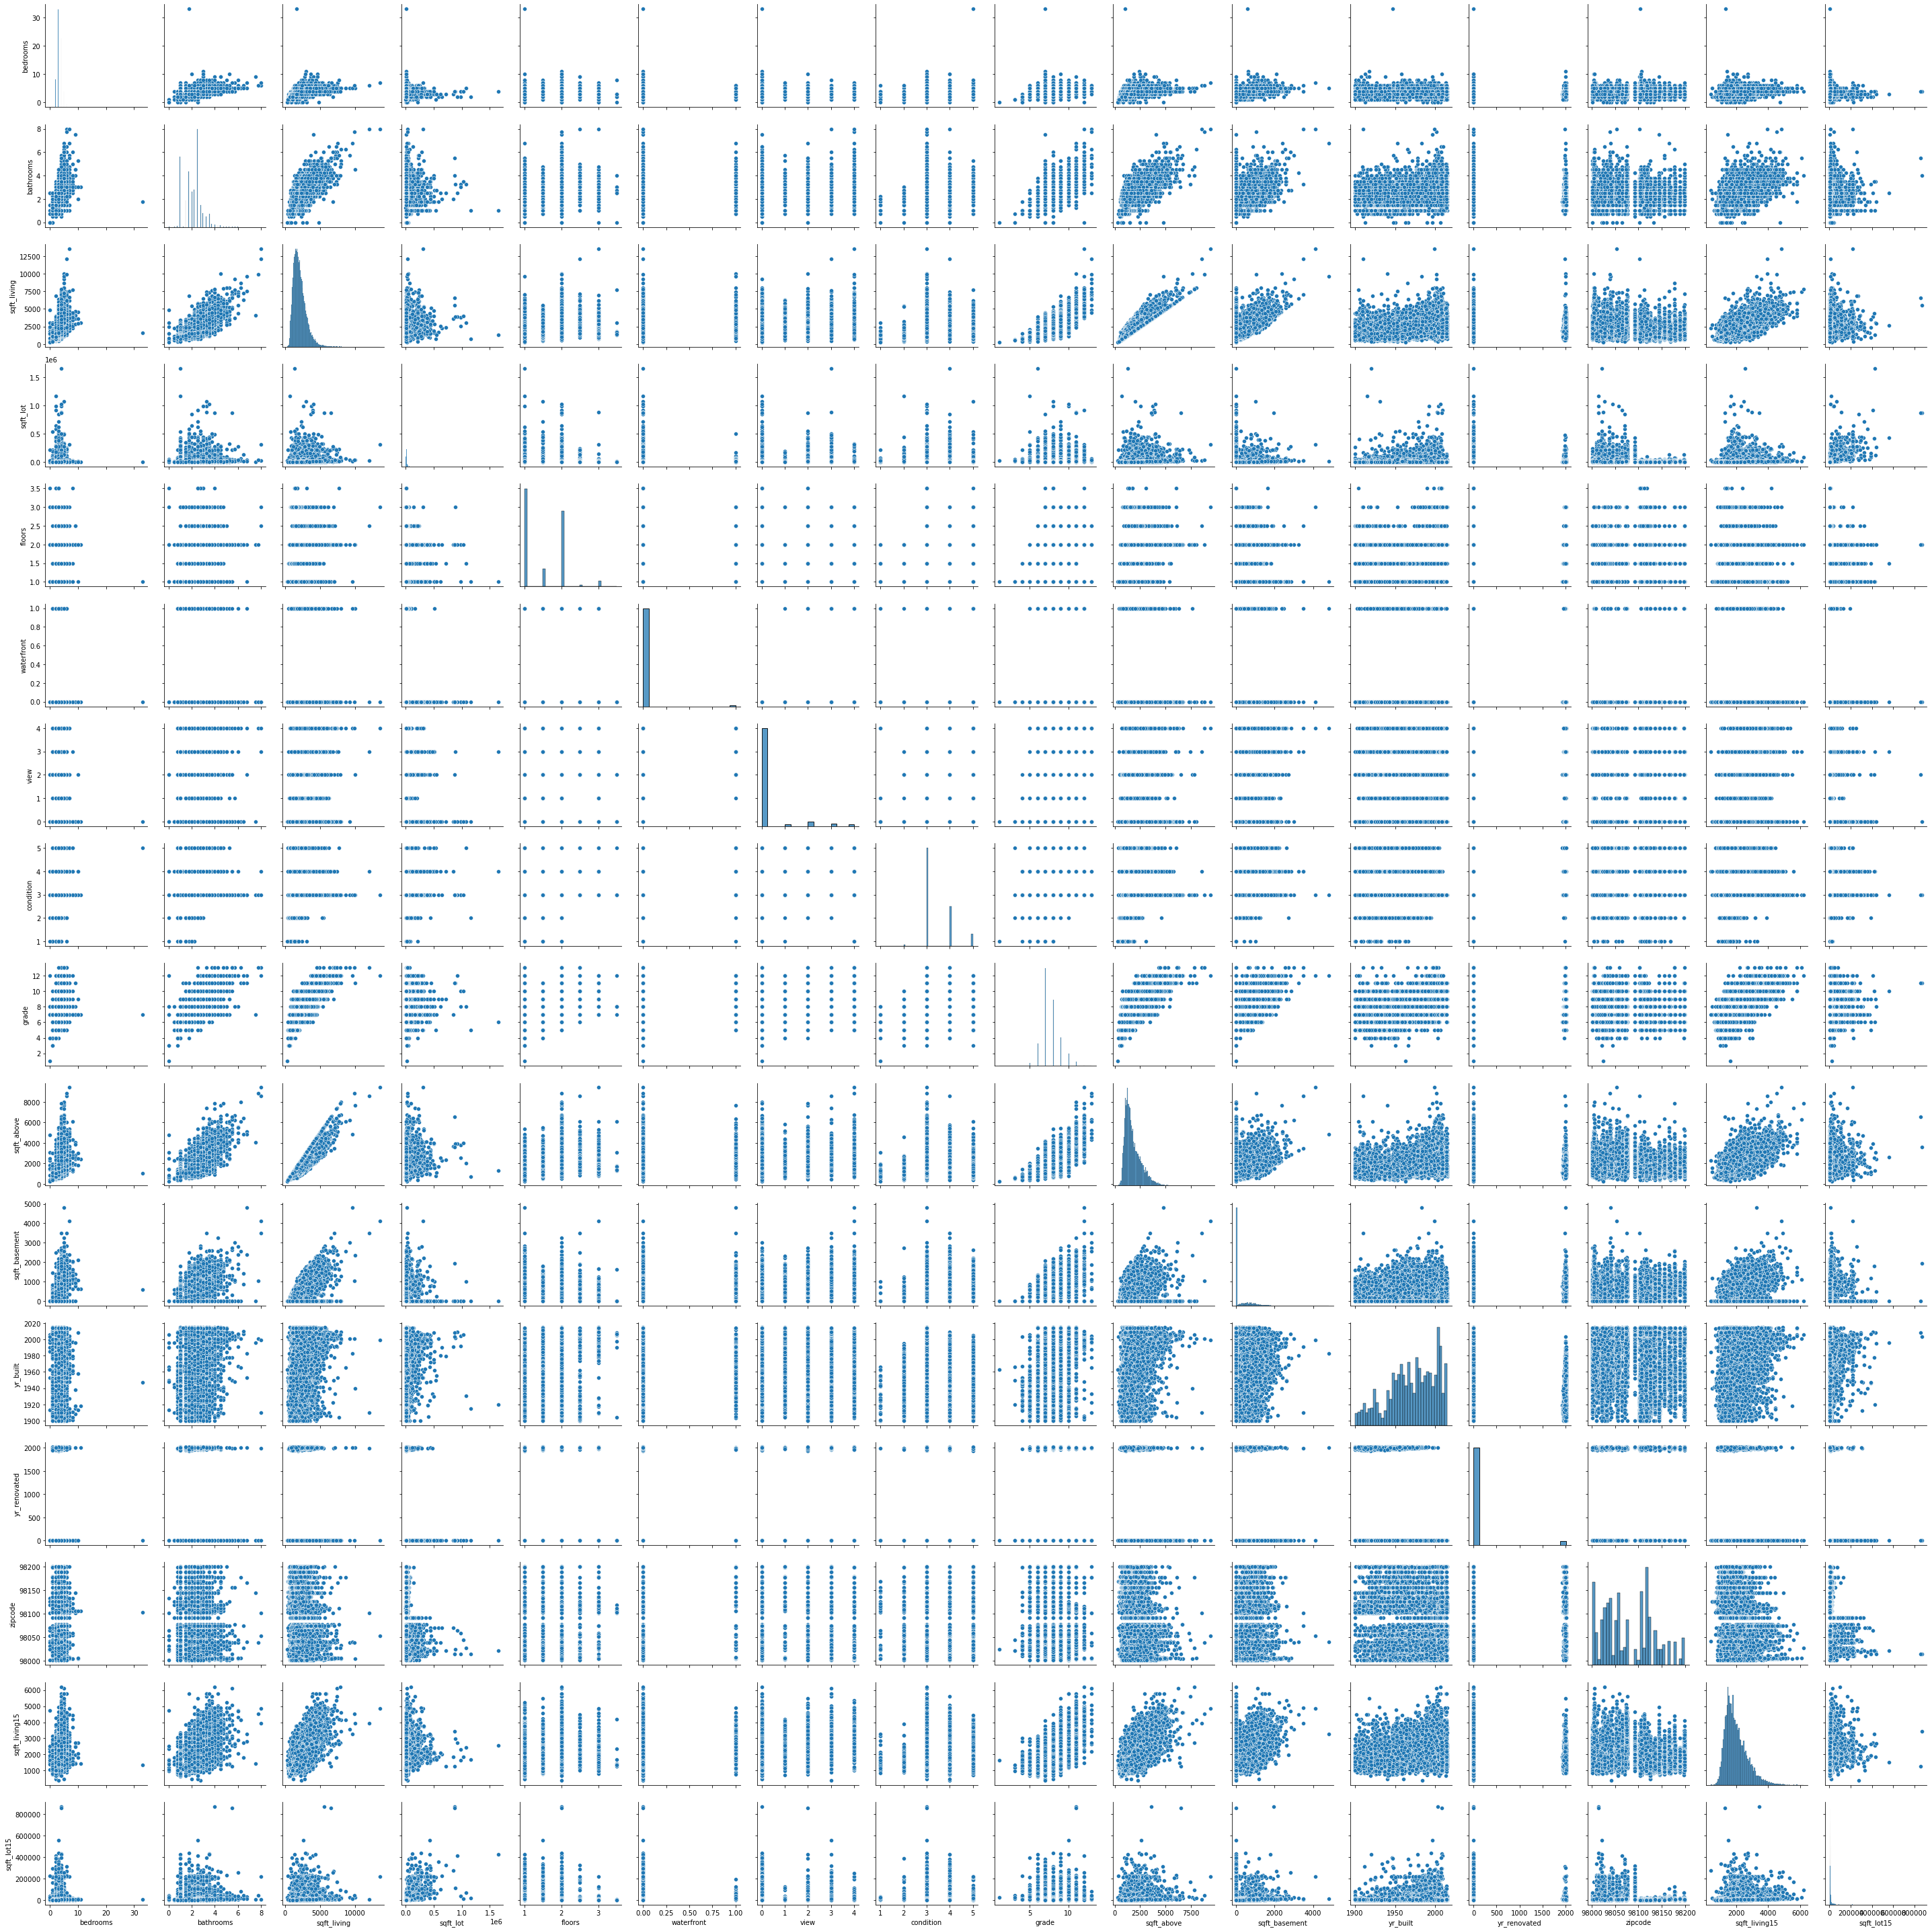

In [18]:
sns.pairplot(houses_df[variables], height = 2.5)
plt.tight_layout()
plt.show()

In [30]:
X2=houses_df[['bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_lot15']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, 
                                   test_size=0.20, random_state=101) 


In [33]:
linear_regression=sm.OLS(y_train,X_train)
fitted_model2= linear_regression.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                          1.056e+04
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:11:13   Log-Likelihood:                     -2.3771e+05
No. Observations:               17290   AIC:                                  4.754e+05
Df Residuals:                   17278   BIC:                                  4.755e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.899e+04   2338.760    -12.397      0.000   -3.36e+04   -2.44e+04
bathrooms      -1.44e+04   3805.758     -3.783      0.000   -2.19e+04   -6936.033
sqft_living     127.3926      2.652     48.033      0.000     122.194     132.591
floors         4779.7220   4330.675      1.104      0.270   -3708.840    1.33e+04
waterfront     5.408e+05   2.14e+04     25.299      0.000    4.99e+05    5.83e+05
view           5.446e+04   2585.913     21.060      0.000    4.94e+04    5.95e+04
condition      6.256e+04   2724.021     22.966      0.000    5.72e+04    6.79e+04
grade          1.167e+05   2510.715     46.465      0.000    1.12e+05    1.22e+05
sqft_above       51.2028      2.547     20.100      0.000      46.210      56.196
sqft_basement    76.1897      3.217     23.680      0.000      69.883      82.496
yr_built       -425.5898      9.825    -43.316      0.000    -444.848    -406.331
yr_renovated     65.2622      4.296     15.191      0.000      56.842      73.683
sqft_lot15       -0.6551      0.065    -10.042      0.000      -0.783      -0.527
==============================================================================
Omnibus:                    12241.630   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           670611.428
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      32.984   Cond. No.                     2.79e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.02e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
y_pred2= fitted_model2.predict(X_test)

In [35]:
d = {'Y': y_test, 'Y predicted': y_pred2}
y_comp2= pd.DataFrame(d)
y_comp2

,Y,Y predicted
3834,349950.0,368724.486587
1348,450000.0,518354.527611
20366,635000.0,565093.984196
16617,355500.0,468708.916654
20925,246950.0,317004.740618
...,...,...
6466,455000.0,231179.368481
12560,445000.0,885462.994202
319,268750.0,72260.382402
16682,433000.0,381018.074366


In [36]:
#Calling back first comparison
y_comp

,Y,Y predicted
3834,349950.0,492322.847062
1348,450000.0,562092.519317
20366,635000.0,474148.955425
16617,355500.0,417724.248244
20925,246950.0,246043.786436
...,...,...
1398,465000.0,433164.299361
3364,418000.0,453618.820148
18958,394250.0,611202.264043
17845,249500.0,163921.860637


## Information Only
### I was trying to find a function or library similar to R's leaps-->regsubset. Unfortunately I couldn't be possible, but I found a set of functions created by Smith College, which are able to do the comparison, but requiring lot of time and memory: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html

In [ ]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,8):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

In [ ]:
models_best.loc[2, "model"].rsquared